**4.	Is there a difference in the number of wins based on hostage?**

Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Reading requierd tables

In [3]:
MatchEventInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchEventInfo.csv')
MatchHomeTeamInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchHomeTeamInfo.csv')
MatchAwayTeamInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchAwayTeamInfo.csv')

**Calculating number of players'win**

droping duplicated data

In [4]:
MatchHomeTeamInfo_dd = MatchHomeTeamInfo.drop_duplicates (subset = 'match_id')
MatchAwayTeamInfo_dd = MatchAwayTeamInfo.drop_duplicates (subset = 'match_id')
MatchEventInfo_dd = MatchEventInfo.drop_duplicates ()

Merging the tables

In [5]:
merged_HW = MatchHomeTeamInfo_dd[['match_id' ,
                                  'player_id']].merge(MatchAwayTeamInfo_dd[['match_id' ,
                                                                            'player_id']],
                                                                             on ='match_id').drop_duplicates (subset = 'match_id')
merged_EHW = merged_HW[['match_id' ,
                        'player_id_x' , 'player_id_y']].merge(MatchEventInfo_dd[['match_id',
                                                                                 'winner_code']],
                                                                                  on ='match_id').drop_duplicates (subset = 'match_id')
merged_EHW = merged_EHW.dropna()
merged_EHW.head()

match_id  player_id_x  player_id_y  winner_code
0  12260075        14486       254742          2.0
1  12260076       206570        90080          1.0
2  12260077        46391       275923          2.0
3  12260078       106755       275923          1.0
5  12260080       221012        57163          1.0

Mapping the winner_code values

In [6]:
merged_EHW['winner_id'] = merged_EHW.apply( lambda x : x['player_id_x']  if x['winner_code']==1 else x['player_id_y'] , axis = 1)

In [7]:
merged_EHW.head()

match_id  player_id_x  player_id_y  winner_code  winner_id
0  12260075        14486       254742          2.0   254742.0
1  12260076       206570        90080          1.0   206570.0
2  12260077        46391       275923          2.0   275923.0
3  12260078       106755       275923          1.0   106755.0
5  12260080       221012        57163          1.0   221012.0

Creating a data frame to show the number of player's win

In [8]:
player = pd.concat ([MatchHomeTeamInfo[['player_id', 'name']] , 
                     MatchAwayTeamInfo[['player_id', 'name']]]).drop_duplicates(subset = 'player_id')
player['no_win_home'] = 0
player['no_win_away'] = 0
for no in player['player_id']:
    player['no_win_home'].loc[player['player_id'] == no] = merged_EHW['match_id'].loc[(merged_EHW['winner_id'] == no)&
                                                                                      (merged_EHW['winner_code'] == 1)].count()
    player['no_win_away'].loc[player['player_id'] == no] = merged_EHW['match_id'].loc[(merged_EHW['winner_id'] == no)&
                                                                                      (merged_EHW['winner_code'] == 2)].count()

C:\Users\Maedeh\AppData\Local\Temp\ipykernel_7992\1930581331.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  player['no_win_home'].loc[player['player_id'] == no] = merged_EHW['match_id'].loc[(merged_EHW['winner_id'] == no)&
C:\Users\Maed

In [9]:
player.head()

player_id          name  no_win_home  no_win_away
0      14486      Nadal R.            0            1
1     206570     Sinner J.            1            2
2      46391     Struff J.            1            0
3     106755     Rublev A.            1            3
4     221012  Cerundolo F.            2            0

Ploting distribution of number of wins based on hastage

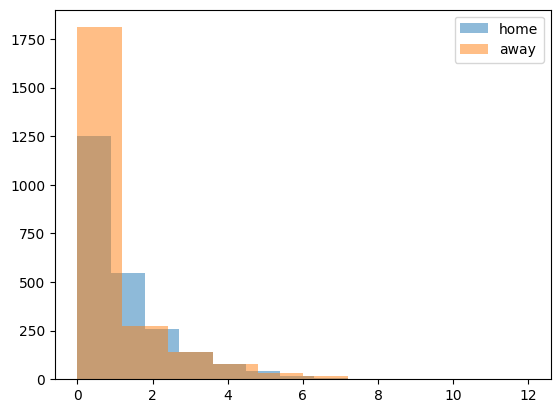

In [10]:
plt.hist(player['no_win_home'],alpha=0.5)
plt.hist(player['no_win_away'], alpha=0.5)
plt.legend(['home', 'away'])
plt.show()

****Two sample Test****

In [11]:
t_statistic, p_value = stats.ttest_ind (player['no_win_home'], player['no_win_home'])
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print ('Samples shows significant difference (reject H0)')
    print ('so there is significant difference the number of wins based on hostage')
else:
    print ( 'Samples dose not show significant difference  (fail to reject H0)')
    print ('so there is not significant difference the number of wins based on hostage')

T-statistic: 0.0, p-value: 1.0
Samples dose not show significant difference  (fail to reject H0)
so there is not significant difference the number of wins based on hostage
